**Importing the libraries**

In [ ]:
import numpy as np
import tensorflow as tf
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits

**Loading the Dataset and Input Data**

In [ ]:
dataset  = load_digits()
X = dataset['data']
Y = dataset['target']

**Splitting the Dataset into Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train , Y_test = train_test_split( X , Y , test_size=0.2)

**Building the Artificial Neural Network Model using Keras**

Neural Network which has 2 layers of 'relu' and the output layer use 'Softmax' for prediction



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(64,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

**Compiling the Neural Network**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Training the model**

In [ ]:
model.fit(X_train, Y_train, epochs=120, validation_data=(X_test, Y_test))

Epoch 1/120
45/45 [==============================] - 0s 5ms/step - loss: 1.0970e-05 - accuracy: 1.0000 - val_loss: 0.0992 - val_accuracy: 0.9750
Epoch 2/120
45/45 [==============================] - 0s 4ms/step - loss: 1.0699e-05 - accuracy: 1.0000 - val_loss: 0.1016 - val_accuracy: 0.9750
Epoch 3/120
45/45 [==============================] - 0s 5ms/step - loss: 1.0382e-05 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9750
Epoch 4/120
45/45 [==============================] - 0s 6ms/step - loss: 1.0109e-05 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy: 0.9750
Epoch 5/120
45/45 [==============================] - 0s 6ms/step - loss: 9.8265e-06 - accuracy: 1.0000 - val_loss: 0.1002 - val_accuracy: 0.9750
Epoch 6/120
45/45 [==============================] - 0s 6ms/step - loss: 9.7293e-06 - accuracy: 1.0000 - val_loss: 0.0998 - val_accuracy: 0.9750
Epoch 7/120
45/45 [==============================] - 0s 6ms/step - loss: 9.5272e-06 - accuracy: 1.0000 - val_loss: 0.1000 - val_ac

**Training loss**

In [ ]:
train_loss, train_acc = model.evaluate(X_train, Y_train)

45/45 [==============================] - 0s 3ms/step - loss: 1.0711e-05 - accuracy: 1.0000


**Testing loss**

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.1002 - accuracy: 0.9750


**ANN Model implementation using Numpy**

In [ ]:
W1 = model.layers[0].get_weights()[0]               # Layer 0 Weights
W2 = model.layers[1].get_weights()[0]               # Layer 1 Weights
W3 = model.layers[2].get_weights()[0]               # Layer 2 Weights

b1 = model.layers[0].get_weights()[1]               # Layer 0 Biases
b2 = model.layers[1].get_weights()[1]               # Layer 1 Biases
b3 = model.layers[2].get_weights()[1]               # Layer 2 Biases

**Activation Function**

In [ ]:
def relu(A):
    return np.maximum(0,A)

def softmax(A):
  exp_A = np.exp(A)
  return exp_A / exp_A.sum()

**Forward Propagation**

In [ ]:
def forward_propagation(X):
  Z1 = np.dot(X , W1) + b1
  A1 = relu(Z1)
  Z2 = np.dot(A1 , W2) + b2
  A2 = relu(Z2)
  Z3 = np.dot(A2 , W3) + b3
  A3 = softmax(Z3)
  return A3

**Calculating Accuracy of the model**

In [ ]:
def accuracy(predictions , labels):
  return np.mean(predictions.argmax(axis=1) == labels)

**Retrieving the Prediction**

In [ ]:
predictions = forward_propagation(X_test)

acc = accuracy(predictions, Y_test)
print("Accuracy: ", acc)

Accuracy:  0.975


**Plotting the images and comparing the performance of Keras and Numpy model**

My ANN Model's Prediction


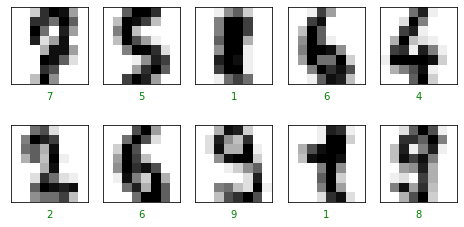

12/12 [==============================] - 0s 2ms/step
Keras implemented ANN Model's Prediction


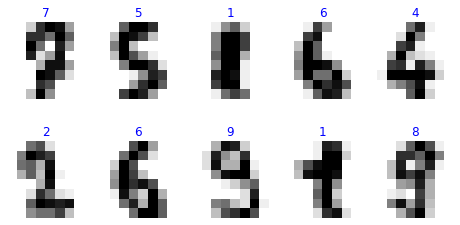

In [ ]:
print("My ANN Model's Prediction")

fig, ax = plt.subplots(2, 5, figsize=(8, 4))

for i, axi in enumerate(ax.flat):
    imgg = X_test[i].reshape(8, 8)
    axi.imshow(imgg, cmap='binary')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(predictions[i].argmax(), color='green')

plt.show()

y_pred = model.predict(X_test)


print("Keras implemented ANN Model's Prediction")
# Keras model plot
fig, axs = plt.subplots(2, 5 ,figsize=(8, 4))
axs = axs.flatten()

for i in range(10):
    img = X_test[i].reshape(8, 8)
    axs[i].imshow(img, cmap='binary')
    axs[i].set_title(np.argmax(y_pred[i]),  color='blue')
    axs[i].axis('off')

plt.show()